 # Grundlagen 1: Lineare Regression - Die Ausgleichs-Gerade

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Das Problem

Wir haben eine Reihe von Messpunkten $(x_1,y_1),\ldots,(x_N,y_N)$. Um uns einen Überblick zu verschaffen, zeichnen wir sie in einem Diagramm auf, und sie scheinen längs einer Geraden zu liegen, wenn auch nicht exakt:

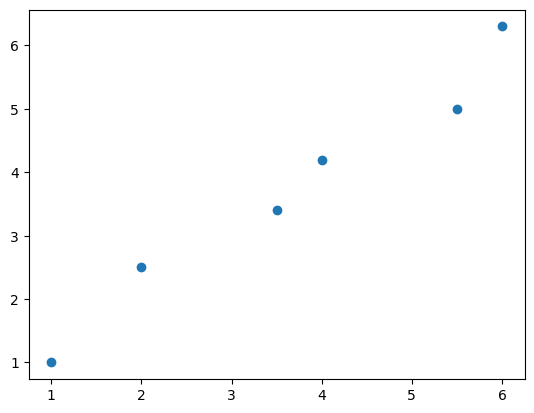

In [2]:
x = [1, 2, 3.5, 4, 5.5, 6]
y = [1, 2.5, 3.4, 4.2, 5, 6.3]

plt.scatter(x, y)
plt.plot();

Wir vermuten einen *linearen* Zusammenhang und suchen nun eine **lineare Funktion** $g$, so dass für alle $k$ gilt: $g(x_k) \approx y_k$.  Mit einer *linearen Funktion* meinen wir dabei, dass $g$ von der Gestalt $$g(x) = m x + b$$ ist mit zwei __Parametern__ $m$ und $b$. Diese Gleichung haben wir in der Schule als __Geradengleichung__ kennengelernt. (Mathematisch korrekt spricht man von einer *affinen Funktion*, denn für lineare Funktionen gilt $g(0) = 0$. Darauf kommen wir noch zurück).

Im allgemeinen wird $g$ nicht durch alle gegebenen Punkte gehen, wenn diese nicht wirklich auf einer Linie aufgereiht sind. 

### Der einfachste Fall: 2 Punkte

Wenn wir nur zwei Punkte $(x_1,y_1)$ und $(x_2,y_2)$ haben, so finden wir natürlich eine Gerade durch diese Punkte. Die Rechnung ist einfach: Wir berechnen $m$ durch $$m = \frac{y_2 - y_1}{x_2 - x_1}$$
und erhalten so die **Steigung** $m$ der Geraden $g$. 

Den Wert für $b$ erhalten wir dann durch Einsetzen wie folgt:

$$g(x_1) = m x_1 + b = \frac{y_2 - y_1}{x_2 - x_1} x_1 + b = y_1 \Rightarrow b = y_1 - \frac{y_2 - y_1}{x_2 - x_1} x_1 = y_1 - m x_1$$

#### Implementierung in Python

In [3]:
from typing import Callable

def g(x: float, y: float) -> Callable:
    m = (y[1] - y[0]) / (x[1] - x[0])
    b = y[0] - m * x[0] 
    return lambda x: m * x + b

def polynom(coeff: list[float]) -> Callable:
    return lambda x: np.sum([c * x ** k for k, c in enumerate(coeff)])

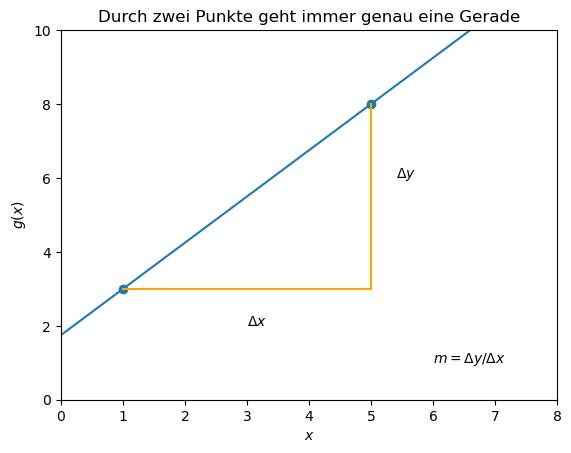

In [4]:
xp = np.array([1,5])
yp = np.array([3,8])

x = np.arange(0,10)
plt.xlim(0,8)        
plt.ylim(0,10)
plt.xlabel('$x$')
plt.ylabel('$g(x)$')
plt.title('Durch zwei Punkte geht immer genau eine Gerade')
plt.scatter(xp,yp)
plt.plot(x,g(xp,yp)(x))

plt.plot(xp,[yp[0],yp[0]], c='orange')
plt.plot([xp[1],xp[1]],yp,c='orange')

plt.text(5.4,6,'$\Delta y$')
plt.text(3,2,'$\Delta x$')
plt.text(6,1,'$m = \Delta y / \Delta x$')
plt.show()

### Die Lineare Regression

Was macht man nun bei mehr als zwei Punkten, die nicht exakt auf einer Geraden liegen? Wie finden wir eine **Ausgleichsgerade**, die "möglichst nahe" an allen diesen Punkten liegt? Dann könnten wir die Gerade als Funktion betrachten, die diese Wertepaare erzeugt, wobei die Abweichungen möglichst klein sind. Dabei wird es eher die Regel sein, dass die Gerade nicht einmal durch einen einzigen dieser Punkte läuft. Ausgehend von dieser Gerade könnten wir dann Werte zwischen den gegebenen Punkten vorhersagen (**interpolieren**), oder die Werte von Punkten, die links oder rechts von unserem Messbereich liegen (**extrapolieren**).

Dazu müssen wir erst einmal überlegen, was es bedeutet, dass die Gerade möglichst nahe an allen Punkten liegt und in diesem Sinne *optimal* ist. Der folgende Ansatz hat sich bewährt:

Zu einer gegebenen Funktion $F$ definiert man den Abstand der Wertepaare zu dieser Funktion als
$$D := \sum_{k=1}^N (F(x_k) - y_k)^2.$$

Es wird also summiert über die Quadrate der Differenzen der Funktionswerte und der tatsächlichen Werte.
Warum macht diese Funktion Sinn? Sie bestimmt zu jedem Wertepaar das Quadrat der Abweichung $f(x_k) - y_k$. Dieses Quadrat ist positiv, und dadurch können sich negative und positive Abweichungen nicht aufheben. Zudem werden größere Abweichung stärker gewichtet. Wir bilden die Summe über alle gegebenen Punkte, dadurch werden alle Wertepaare gleich berücksichtigt. Diese Fehlerquadratsumme ist ein geeignetes Maß, um Funktionen zu bewerten. Dabei spielt es keine Rolle, ob die Funktion ein Polynom ist oder irgendeine andere Form hat.

Gesucht ist nun eine Funktion $F$, die diese **Fehlerquadratsumme** minimiert. Bei der **Linearen Regression** wird dabei eine lineare Funktion gesucht, d.h. eine Funktion der Gestalt $$F(x) = mx + b.$$

Der Ansatz wird die **Methode der kleinsten Quadrate** genannt.

Wie wir gesehen haben, gibt es be zwei Wertepaaren ($N=2$) genau eine lineare Funktion, die durch die beiden Punkte geht und die $D$ damit zu 0 macht. Für $N>2$ wird es im allgemeinen keine Gerade geben, die durch alle Punkte geht, aber es gibt genau eine Funktion $F$, die $D$ minimiert. Dies sieht man wie folgt:

Für Funktionen $F(x) = mx + b$ ist die Fehlerquadratsumme 
$$D(F) = D(m,b) = \sum_{k=1}^N (F(x_k) - y_k)^2 = \sum_{k=1}^N (mx_k + b - y_k)^2$$
eine Funktion der beiden Parameter $m$ und $b$. Gesucht sind zwei Zahlen $m,b$, so dass $D(m,b)$ minimal ist. Dort muss
$$\nabla D(m,b) = 0$$ sein, also 
$$\frac{\partial D}{\partial m} (m,b) = 0, \frac{\partial D}{\partial b} (m,b)= 0$$

Dies führt zu dem linearen Gleichungssystem

$$\frac{\partial D}{\partial m} (m,b) = \sum_{k=1}^N 2 x_k(mx_k + b - y_k) = 0 $$
$$\frac{\partial D}{\partial b} (m,b) = \sum_{k=1}^N 2 (mx_k + b - y_k) = 0$$

und nach einigen Umformungen (und Streichen der 2)

$$
\begin{equation}
\begin{split}
(\sum_{k=1}^N  x_k^2) m  + (\sum_{k=1}^N  x_k)b &= \sum_{k=1}^N  x_k y_k \\
(\sum_{k=1}^N x_k) m + N b  &= \sum_k^N y_k
\end{split}
\end{equation}
$$
Dieses Gleichungssystem hat die Form 

$$ 
\begin{equation}
\begin{split}
a_1m +b_1 b &= c_1 \\
a_2m +b_2 b &= c_2
\end{split}
\end{equation}
$$

und besitzt die eindeutige Lösung

$$ b = \frac{a_2 c_1 - a_1 c_2}{a_2 b_1 - a_1 b_2}, m = \frac{c_1 - b_1 b}{a_1}. $$

Dieses Verfahren lässt sich leicht implementieren. Dazu berechnet man zunächst aus den gegebenen Wertepaaren

$$a_1 = \sum  x_k^2, b_1 = \sum  x_k, c_1 =  \sum  x_k y_k, \;a_2 = \sum  x_k, b_2 = N, c_2= \sum y_k$$
und bestimmt dann $m$ und $b$ gemäß der angegebenen Gleichung.

Die Distanzfunktion berechnet die Fehlerquadratsumme und bestimmt die Güte der Approximation. In der Theorie der KNN wird diese Funktion auch Kosten- oder **Verlustfunktion** (eng. __Loss Function__) genannt und uns in diesem Zusammenhang bald wieder begegnen.

### Implementierung der linearen Regression

In [5]:
def koeffizienten(x: list[float], y: list[float]) -> (float, float, float, float, float):
    """
    Berechnung der Koeffizienten des Gleichungssystems
    a1*m + b1*b = c1
    a2*m + b2*b = c2
    """
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x * x)
    sum_xy = np.sum(x * y)
    N = x.shape[0]
    return sum_xx, sum_x, sum_xy, sum_x, N, sum_y

def lin_reg(x: list[float], y: list[float]) -> (float, float):
    """
    Einfache Implementierung der linearen Regression
    """
    a1, b1, c1, a2, b2, c2 = koeffizienten(x,y)
    # Lösung des Gleichungssystems
    b = (a2 * c1 - a1 * c2) / (a2 * b1 - a1 * b2)
    m = (c1 - b1 * b) / a1
    return (m, b)

def D(x: list[float], y: list[float], f: Callable) -> float:
    """
    Die Distanzfunktion berechnet die Fehlerquadratsumme
    """
    return np.sum((f(x) - y) ** 2)

### Ein einfaches Beispiel mit drei Punkten

Wir zeigen die Berechnung des Gradienten am (einfachsten) Beispiel mit drei Punkten

In [6]:
beispiel_1 = np.array([1,3,6]),np.array([5,10,13])

#### Wir machen uns ein Bild von den Daten

Die drei Punkte liegen offensichtlich nicht genau auf einer Geraden.

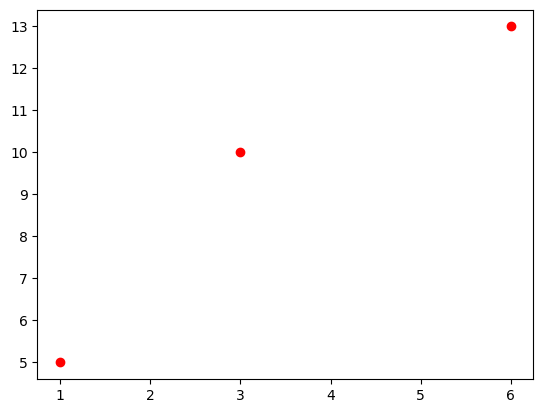

In [7]:
x, y = beispiel_1

plt.scatter(x,y,color='red')
plt.show()

#### Das Ergebnis der Linearen Regression

Die Ausgleichsgerade minimiert die Distanzfunktion, ohne tatsächlich durch einen einzelnen Punkt zu gehen.

Die Koeffizienten der Ausgleichsgerade lauten: (1.5526315789473684, 4.157894736842105)


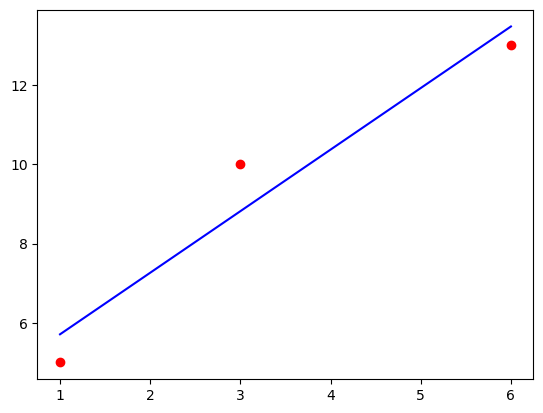

In [8]:
koeff = lin_reg(x,y)
print(f'Die Koeffizienten der Ausgleichsgerade lauten: {koeff}')
p = polynom(np.flip(np.array(lin_reg(x,y))))
plt.scatter(x, y, c='r')
plt.plot(x, [p(x) for x in x], c='b')

plt.show()

### Ein etwas gößeres Beispiel

Wir berechnen einige Punkte für die Funktion $F(x) = 3x + 5$ und "verrauschen" die Messergebnisse. Unsere Ausgleichgerade $g$ sollte dann ähnliche Koeffizienten wie $F$ haben.

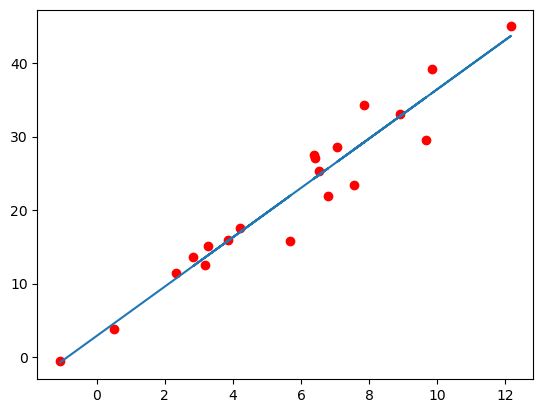

In [9]:
N = 20
x = np.linspace(1,10,N) + np.random.normal(0,1,N)
y = 3 * x + 5 + np.random.normal(0,3,N)

g = polynom(np.flip(np.array(lin_reg(x,y))))

plt.scatter(x, y, c='r')
plt.plot(x,[g(x) for x in x])
plt.show()

### Lineare Regression aus NumPy

`NumyPy` enthält zahlreiche Funktionen aus der Welt der Mathematik. Dazu gehört auch die Polynomiale Regression, und die dazugehörende Funktion heißt `polyfit`.
Wir wollen einmal unsere Lösung mit der in `NumPy` implementierten Lösung vergleichen.

Die Koeffizienten der Ausgleichsgerade lauten: [1.55263158 4.15789474]


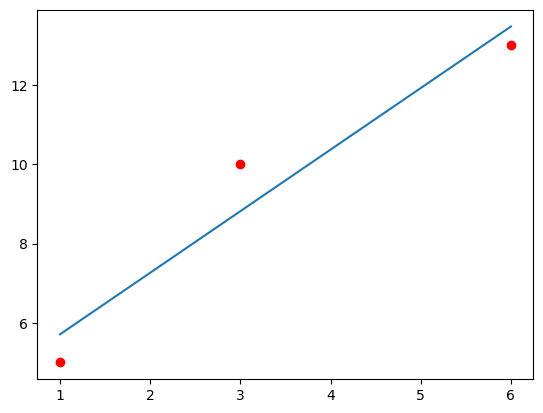

In [10]:
x, y = beispiel_1

koeff = np.polyfit(x,y,1)
print(f'Die Koeffizienten der Ausgleichsgerade lauten: {koeff}')

g = polynom(np.flip(np.array(koeff)))
plt.scatter(x, y, c='r')
plt.plot(x, [g(x) for x in x])
plt.show()

Die erhaltenden Werte sind identisch. Natürlich ist die Implementierung in `NumPy` effizienter als unsere, was bei großen Datenmengen spürbar wird.

### Zur Geschichte des Verfahrens

Das Verfahren wurde Anfang des 19. Jahrhundert von Carl Friedrich Gauß entwickelt. Die wissenschaftliche Welt stand damals vor der Herausforderung, dass der gerade entdeckte Planetoid Ceres hinter der Sonne verschwand, und nun anhand weniger Messdaten wiedergefunden werden musste. Gauß konnte mit seiner neuen Methode die Bahn so gut vorausberechnen, dass die Astronomen wussten, wo sie zu suchen hatten und Ceres sehr schnell wiederentdeckt werden konnte. 

### Links
 
[1] [Methode der kleinsten Quadrate bei Wikipedia](https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate).